# Geologic profiles - the Colfiorito 1997 seismic sequence (Central Italy)

*Doc started 2022-03-13*

*Current version: 2022-12-03*

*Last running version: 2022-12-03*

We present here an example of creating geological profiles using a seismic dataset, the Colfiorito 1997 seismic sequence. 

## Importing the basic topographic and profile data

The input datasets are the topographic data, the base profile, faults compiled from literature and seismic data from the Colfiorito 1997 seismic sequence.

### Topographic dataset

As the source topographic dataset, we use a SRTM2-derived DEM.

In [1]:
source_data = "../../example_data/colfiorito_2007/srtm2.tif"

In [3]:
from gst.io.rasters.gdal_io import read_raster_band
result, err = read_raster_band(raster_source=source_data)

In [4]:
print(err)

In [6]:
geotransform, epsg, band_params, data = result

In [7]:
for info in (geotransform, epsg, band_params, data):
    print(f"info type: {type(info)}:\n\n{info}\n\n")

info type: <class 'pygsf.geometries.georeferencing.geotransform.GeoTransform'>:

[ 3.06121846e+05  8.02576886e+01  0.00000000e+00  4.78226131e+06
  0.00000000e+00 -8.02576886e+01]


info type: <class 'int'>:

32633


info type: <class 'dict'>:

{'dataType': 'Int16', 'unitType': '', 'stats': {'min': 183.0, 'max': 1570.0, 'mean': 714.76141336527, 'std_dev': 294.45128151837}, 'noData': -32768.0, 'numOverviews': 0, 'numColorTableEntries': 0}


info type: <class 'numpy.ndarray'>:

[[485. 505. 453. ... 644. 643. 637.]
 [493. 498. 453. ... 625. 637. 656.]
 [493. 498. 446. ... 617. 631. 650.]
 ...
 [404. 402. 398. ... 735. 735. 736.]
 [406. 398. 393. ... 734. 737. 743.]
 [406. 398. 393. ... 736. 739. 742.]]




Given the array data and the geotransform specifications, we can create a grid by using the Grid class:

In [8]:
from pygsf.geometries.grids.rasters import Grid

grid = Grid(
    array = data,
    geotransform=geotransform)

It is then possible to plot the DEM in a map, by using the 'maps' function:

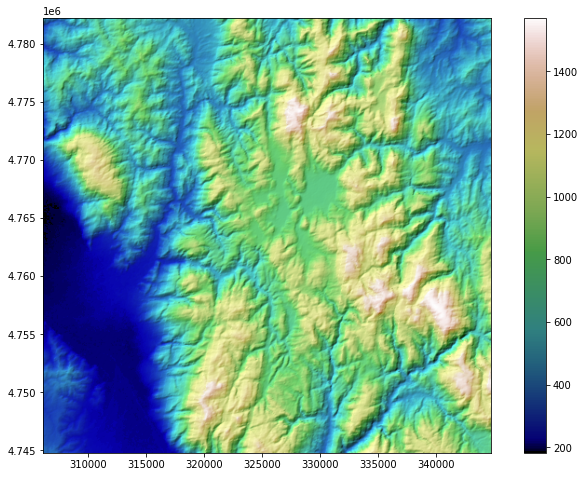

In [10]:
from gst.plots.parameters import *
from gst.plots.mpl import *

figure_parameters = FigurePlotParams(
    width=12,
    height=8
)

maps(
    grid,
    fig_params=figure_parameters
)

### Profile dataset

The profile trace is imported from a shapefile.

In [11]:
from gst.io.vectors.ogr_io import try_read_line_shp_with_attr

src_profile_shapefile_pth = "../../example_data/colfiorito_2007/single_profile_swne.shp"
success, result = try_read_line_shp_with_attr(
    src_profile_shapefile_pth)

In [12]:
print(success)

True


In [13]:
print(result, type(result))

([([Ln with 2 point(s): Point([ 317056.40449054 4757983.43781666]), Point([ 336834.76618372 4771840.88868449])], ())], 32633) <class 'tuple'>


The result is composed by a list of GeoLines - attributes pairs (stored as tuples). Each attribute set is applicable to all of the GeoLine list elements: remember that the source layer could store MultiLines. In the current case, we have just a single record, composed by a list with a single GeoLine2D and an empty attribute tuple (last nested empty tuple in printed results).

Since there is just one line, so we extract it from the list:

In [14]:
([([profile_line], _)], epsg_code) = result

In [15]:
print(epsg_code)

32633


In [16]:
print(profile_line)

Ln with 2 point(s): Point([ 317056.40449054 4757983.43781666]), Point([ 336834.76618372 4771840.88868449])


We plot the line in a map:

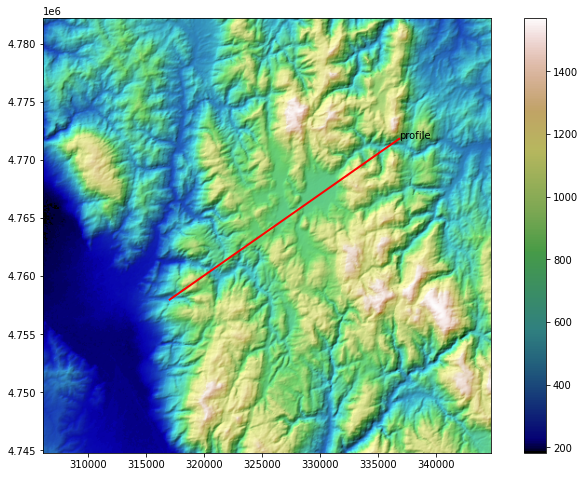

In [17]:
figure_parameters = FigurePlotParams(
    width=12,
    height=8
)

profile_parameters = GenericPlotParams(
    color="red",
    linestyle='-',
    width=2.0,
    labels=True,
)

maps(        
    grid,
    lines = {
        'profile': {'data': [profile_line], 'params': profile_parameters},
    },
    fig_params=figure_parameters
)

### Reading the fault dataset

The fault dataset derives from a compilation of faults taken from the literature.

In [18]:
import geopandas
faults_shape = "../../example_data/colfiorito_2007/faults.shp"
faults_dataframe = geopandas.read_file(faults_shape)
faults_dataframe

ID          TYPE               AGE  NAME                          SOURCE  \
0     0        normal  plio-pleistocene  None               alberti-dottorato   
1     0  transcurrent           miocene  None               alberti-dottorato   
2     0  transcurrent           miocene  None               alberti-dottorato   
3     0        normal  plio-pleistocene  None               alberti-dottorato   
4     0  transcurrent           miocene  None               alberti-dottorato   
..   ..           ...               ...   ...                             ...   
111   0  transcurrent              None  None  Foglio Geologico 131 - Foligno   
112   0        normal  plio-pleistocene  None               alberti-dottorato   
113   0        normal              None  None  Foglio Geologico 131 - Foligno   
114   0  transcurrent           miocene  None               alberti-dottorato   
115   0  transcurrent              None  None  Foglio Geologico 131 - Foligno   

                                              geometry  
0    LINESTRING (322826.419 4744019.275, 322929.085...  
1    LINESTRING (327028.889 4744340.902, 326963.518...  
2    LINESTRING (326905.837 4744390.892, 326846.874...  
3    LINESTRING (325464.414 4744230.306, 325515.935...  
4    LINESTRING (325844.605 4743814.583, 325807.297...  
..                                                 ...  
111  LINESTRING (318270.514 4753244.779, 318377.911...  
112  LINESTRING (322067.405 4743259.772, 322071.072...  
113  LINESTRING (321842.414 4743521.352, 321790.473...  
114  LINESTRING (326548.290 4744424.878, 326452.079...  
115  LINESTRING (326548.290 4744424.878, 326658.292...  

[116 rows x 6 columns]

In [19]:
from gst.io.vectors.ogr_io import read_lines_shapefile

epsg_code, faults_dict = read_lines_shapefile(
        line_shp_path=faults_shape,
        id_field_name="type")

The faults are extracted as a dictionary, where the key elements are those found in the id field. Each key stores all the lines sharing the same key. It is therefore easy, when convenient, just consider a subset of the dictionay.

As before, we can plot the data in a map, by defining their graphic parameters:

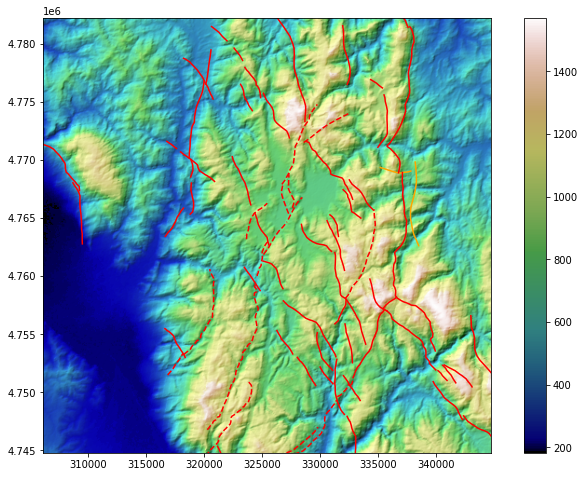

In [20]:
from gst.plots.mpl import *

maps(        
    grid,
    
    lines = {
        'faults': {
            'data': faults_dict,
            'params': {
                "normal": GenericPlotParams(color="red", width=1.5, linestyle='-', labels=False),
                "transcurrent": GenericPlotParams(color="red", width=1.5, linestyle='--', labels=False),
                "undefined": GenericPlotParams(color="orange", width=1.5, linestyle='-', labels=False),
                "thrust": GenericPlotParams(color="red", width=1.5, linestyle='-', labels=False),  
            },
        },
    },
    fig_params = FigurePlotParams(
        width=12,
        height=8
    )
)

## Reading seismic data of Colfiorito sequence

We now read a dataset of the 1997 Colfiorito seismic sequence, stored in a shapefile:

In [21]:
seisms_shape = "../../example_data/colfiorito_2007/ipocentri3d_shcm_wu3.shp"

Geopandas can be used to inspect the data:

In [22]:
import geopandas

seisms = geopandas.read_file(seisms_shape)

seisms

OBJECTID  DEPTH  YEAR  MONTH  DAY  HOUR  MINUTE  MAGNITUDE  STRIKE  DIP  \
0           1  6.270  1997      9    3    22       7        4.4     137   30   
1           2  5.700  1997      9   26     0      33        5.6     152   46   
2           3  5.700  1997      9   26     9      40        5.8     144   42   
3           5  3.900  1997      9   26    13      30        4.3     147   29   
4          49  5.700  1997      9   27     8       8        4.3     148   55   
..        ...    ...   ...    ...  ...   ...     ...        ...     ...  ...   
325      1484  1.630  1997     10   27    14      34        2.4     160   65   
326      1487  1.136  1997     10   27    16      44        2.4      95   55   
327      1489  1.787  1997     10   27    19      27        2.9     330   75   
328      1495  4.712  1997     10   28     7      42        3.1     120   45   
329      1497  2.453  1997     10   28    12      35        2.4     130   55   

     RAKE        DATA     DATAEND  EPICENTER_  DEPTH_M  DEPTH_CORR       X  \
0     -88  1997-09-03  1997-09-04       804.0    -6270       -5466  327572   
1     -83  1997-09-26  1997-09-27       830.0    -5700       -4870  328216   
2     -80  1997-09-26  1997-09-27       838.0    -5700       -4862  325835   
3     -88  1997-09-26  1997-09-27       841.0    -3900       -3059  332530   
4     -89  1997-09-27  1997-09-28       641.0    -5700       -5059  322920   
..    ...         ...         ...         ...      ...         ...     ...   
325   -60  1997-10-27  1997-10-28       805.0    -1630        -825  324353   
326  -120  1997-10-27  1997-10-28       972.0    -1136        -164  326337   
327  -140  1997-10-27  1997-10-28      1051.0    -1787        -736  331932   
328   -90  1997-10-28  1997-10-29       804.0    -4712       -3908  330369   
329  -100  1997-10-28  1997-10-29       760.0    -2453       -1693  326579   

           Y     Z                                    geometry  
0    4765486 -5466  POINT Z (327572.206 4765486.491 -5466.000)  
1    4765470 -4870  POINT Z (328215.918 4765470.292 -4870.000)  
2    4766420 -4862  POINT Z (325834.812 4766419.524 -4862.000)  
3    4765174 -3059  POINT Z (332529.863 4765174.395 -3059.000)  
4    4773184 -5059  POINT Z (322920.439 4773184.390 -5059.000)  
..       ...   ...                                         ...  
325  4764616  -825   POINT Z (324353.156 4764615.822 -825.000)  
326  4762840  -164   POINT Z (326337.146 4762840.171 -164.000)  
327  4763607  -736   POINT Z (331931.728 4763607.485 -736.000)  
328  4758433 -3908  POINT Z (330368.680 4758432.793 -3908.000)  
329  4764563 -1693  POINT Z (326579.350 4764563.139 -1693.000)  

[330 rows x 20 columns]

We check that the seisms CRS is the same as the other datasets:

In [23]:
seisms.crs

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 12°E to 18°E - by country
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

For extracting the seisms data in a format compatible with 'pygsf', the 'extract_faults' function can be used:

In [24]:
from pprint import pprint
from gst.geopandas.geopandas import extract_faults

geofaults, err = extract_faults(
    geodataframe = seisms, 
    azim_fldnm = "STRIKE", 
    dip_ang_fldnm = "DIP",
    rake_fldnm = "RAKE",
    is_rhrstrike = True
)

The input data are transformed into a list of points:

In [25]:
hypocenters = [point for _, point, _ in geofaults]

Now the seisms can be plotted into a map, together with the previous datasets: 

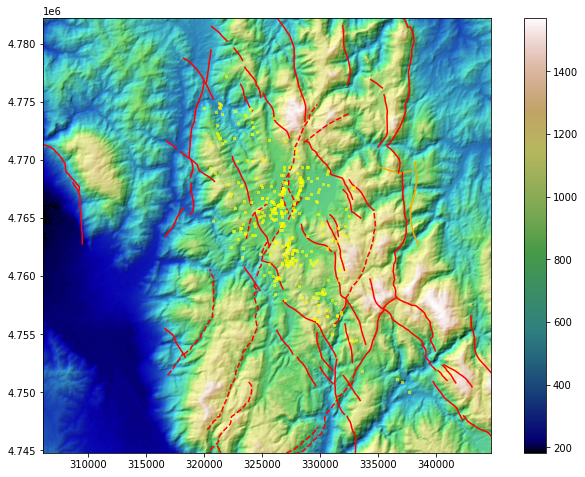

In [26]:
from gst.plots.mpl import *

maps(        
    grid,
    lines = {
        'faults': {
            'data': faults_dict,
            'params': {
                "normal": GenericPlotParams(color="red", width=1.5, linestyle='-', labels=False),
                "transcurrent": GenericPlotParams(color="red", width=1.5, linestyle='--', labels=False),
                "undefined": GenericPlotParams(color="orange", width=1.5, linestyle='-', labels=False),
                "thrust": GenericPlotParams(color="red", width=1.5, linestyle='-', labels=False),  
            },
        },
    },
    points = {
        'hypocenters': {
            'data': hypocenters,
            'params': GenericPlotParams(
                marker = 's',
                markersize = 2.2,
                color = "yellow",
                alpha = 0.6,
                labels=False
            )
        },
    },
    fig_params = FigurePlotParams(
        width=12,
        height=8
    )
)

## Creating the profiles

The operations of profiling topographic and geological data are based on the concepts of 'profilers'.
There are three levels of them: a segment profiler ("SegmentProfiler"), a line profiler ("LineProfiler") and a generic profiler ("Profiler"), that can store one or more line profilers. 

In this example we do not use directly segment or line profilers, since we directly create a Profiler instance from the profile read from the shapefile.

### Creating the Profiler instance

We create a Profiler instance, by defining the number of parallel profilers to create and their lateral offset (i.e., the perpendicular spacing between them):

In [27]:
from pygsf.profiles.profilers import Profiler

profiler = Profiler(
    src_trace=profile_line,
    num_profiles=11,
    offset=2000, # meters
)

In [28]:
profiler

Profiler([
LineProfiler(
	source line = Ln with 2 point(s): Point([ 311318.28057977 4766173.30558022]), Point([ 331096.64227294 4780030.75644805]))
LineProfiler(
	source line = Ln with 2 point(s): Point([ 312465.90536192 4764535.33202751]), Point([ 332244.2670551  4778392.78289533]))
LineProfiler(
	source line = Ln with 2 point(s): Point([ 313613.53014408 4762897.35847479]), Point([ 333391.89183725 4776754.80934262]))
LineProfiler(
	source line = Ln with 2 point(s): Point([ 314761.15492623 4761259.38492208]), Point([ 334539.51661941 4775116.83578991]))
LineProfiler(
	source line = Ln with 2 point(s): Point([ 315908.77970839 4759621.41136937]), Point([ 335687.14140156 4773478.8622372 ]))
LineProfiler(
	source line = Ln with 2 point(s): Point([ 317056.40449054 4757983.43781666]), Point([ 336834.76618372 4771840.88868449]))
LineProfiler(
	source line = Ln with 2 point(s): Point([ 318204.0292727  4756345.46426394]), Point([ 337982.39096587 4770202.91513177]))
LineProfiler(
	source line = L

The result can be displayed with the 'maps' function:

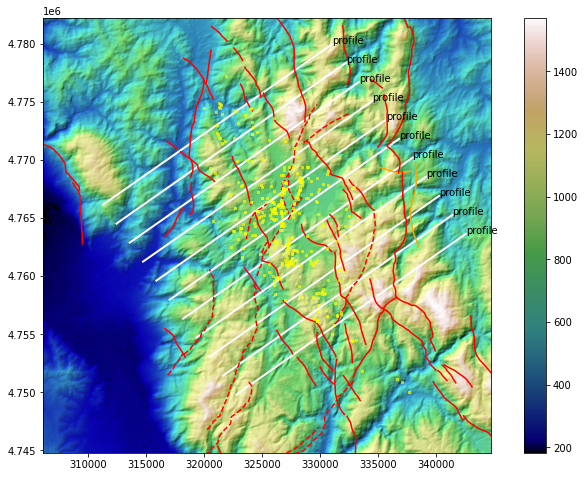

In [29]:
maps(        
    grid,
    lines = {
        'profile': {
            'data': profiler.lines, 
            'params': GenericPlotParams(
                color="white",
                linestyle='-',
                width=2.0,
                labels=True,
            )
        },
        'faults': {
            'data': faults_dict,
            'params': {
                "normal": GenericPlotParams(color="red", width=1.5, linestyle='-', labels=False),
                "transcurrent": GenericPlotParams(color="red", width=1.5, linestyle='--', labels=False),
                "undefined": GenericPlotParams(color="orange", width=1.5, linestyle='-', labels=False),
                "thrust": GenericPlotParams(color="red", width=1.5, linestyle='-', labels=False),  
            },
        },
    },
    points = {
        'hypocenters': {
            'data': hypocenters,
            'params': GenericPlotParams(
                marker = 's',
                markersize = 2.2,
                color = "yellow",
                alpha = 0.6,
                labels=False
            )
        },
    },
    fig_params = FigurePlotParams(
        width=12,
        height=8
    )
)


# Creating a set of parallel geological profiles

In [30]:
from pygsf.profiles.geoprofiles import GeoProfiles

geoprofiles = GeoProfiles(profiler=profiler)

In [31]:
err = geoprofiles.sample_grid(
    grid=grid,
    sampling_distance=10 # meters
)
assert not err

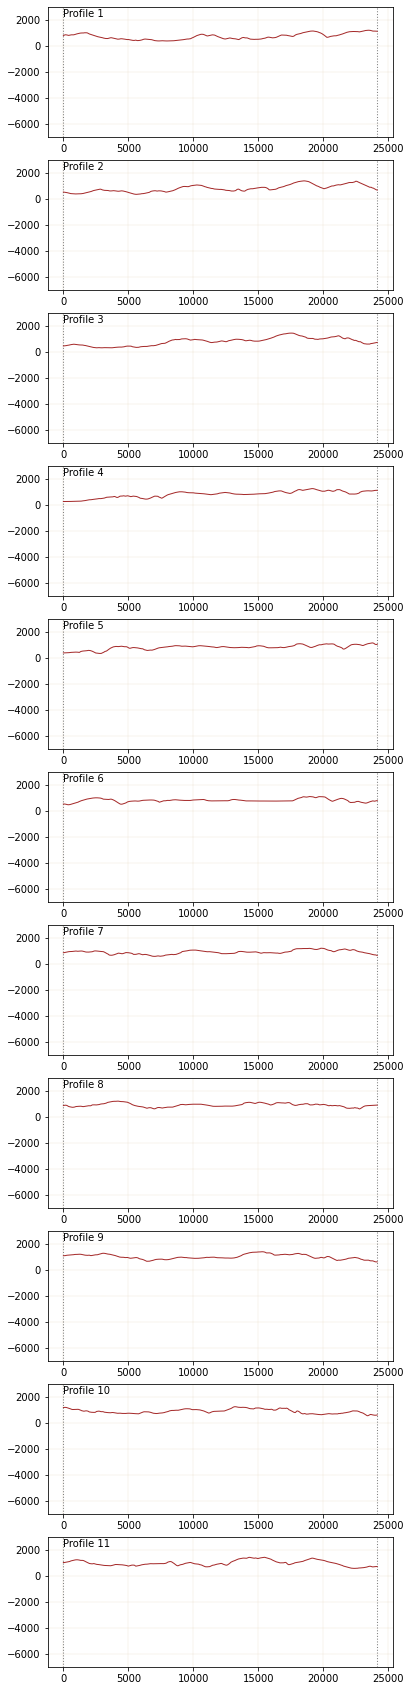

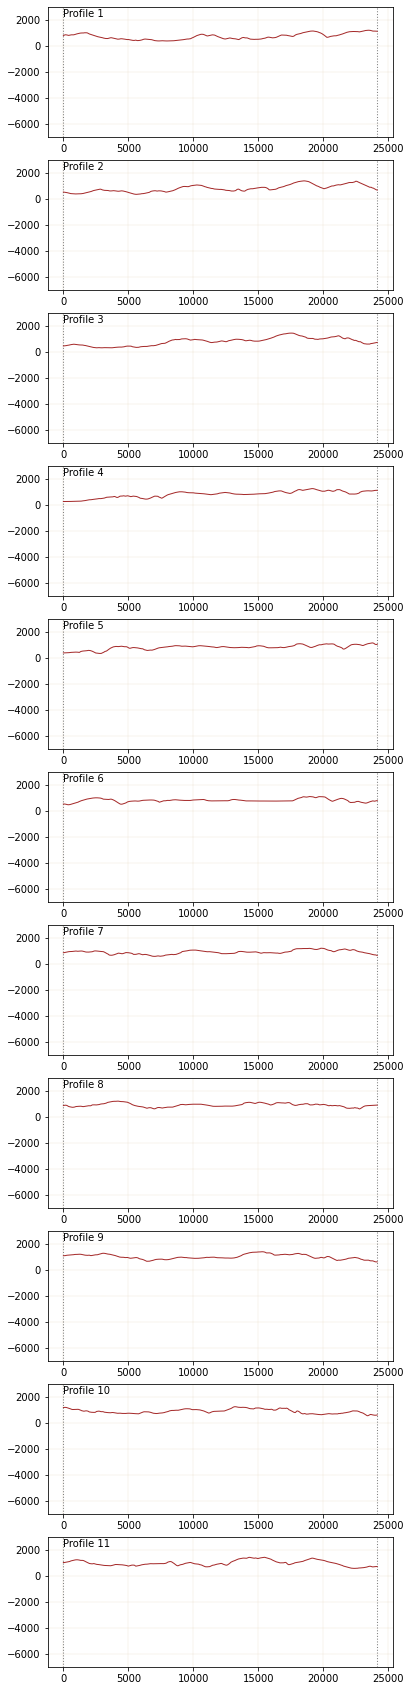

In [32]:
from gst.plots.mpl import *

profiles(
    geoprofiles,
    aspect=1, 
    linewidth=1,
    axis_params=AxisPlotParams(
        z_min=-7000,
        z_max=3000,
    ),
)

## Adding fault intersections to profiles

In [33]:
err = geoprofiles.intersect_lines(
    faults_dict
)

In [34]:
print(err)

In [35]:
print(faults_dict)

defaultdict(<class 'list'>, {'normal': [Ln with 107 points: Point([ 322826.41901337 4744019.27511901]), Point([ 322929.08465855 4743958.90711897]), .., Point([ 326906.73840805 4739548.35225421]), Point([ 326988.41607267 4739472.30753199]), Ln with 9 points: Point([ 325464.41414252 4744230.30606386]), Point([ 325515.93538551 4744171.67844253]), .., Point([ 325798.41392464 4743841.23184958]), Point([ 325826.83943801 4743798.59357953]), Ln with 16 points: Point([ 322331.82102248 4741090.78266651]), Point([ 322251.43789588 4741187.24241843]), .., Point([ 321367.22350326 4742103.6100617 ]), Point([ 321336.4099714  4742138.44274989]), Ln with 32 points: Point([ 322947.55577225 4739961.66768151]), Point([ 322906.82832144 4740058.12743343]), .., Point([ 321448.14251738 4741659.35931534]), Point([ 321405.27151652 4741708.66096632]), Ln with 93 points: Point([ 321974.79486002 4738972.54452363]), Point([ 322009.11142705 4738923.12866711]), .., Point([ 323230.952796   4734063.90277621]), Point([ 3

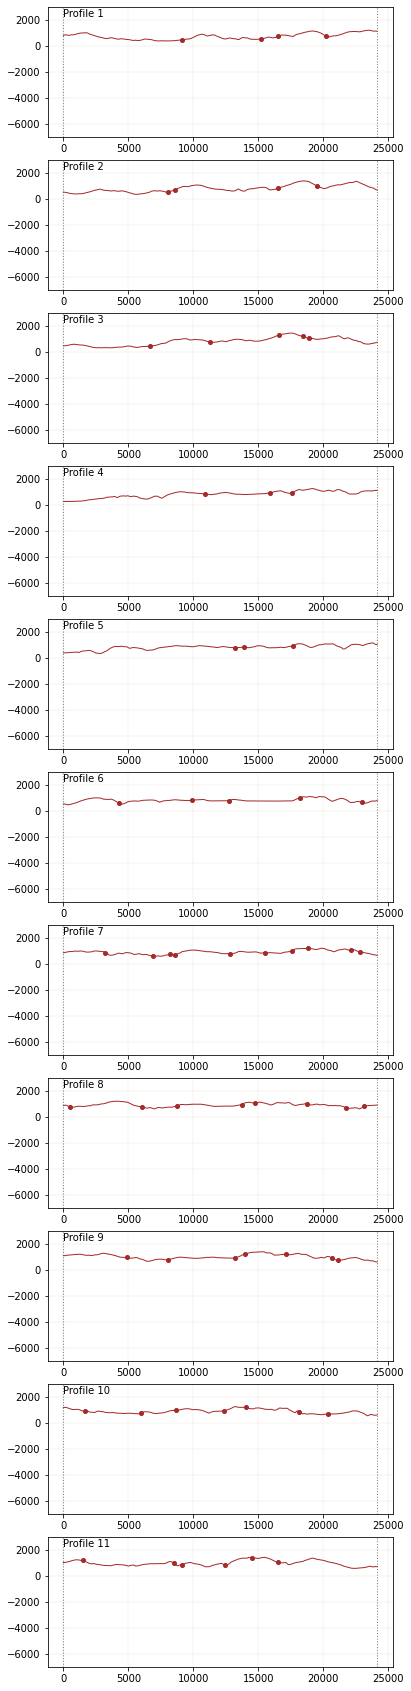

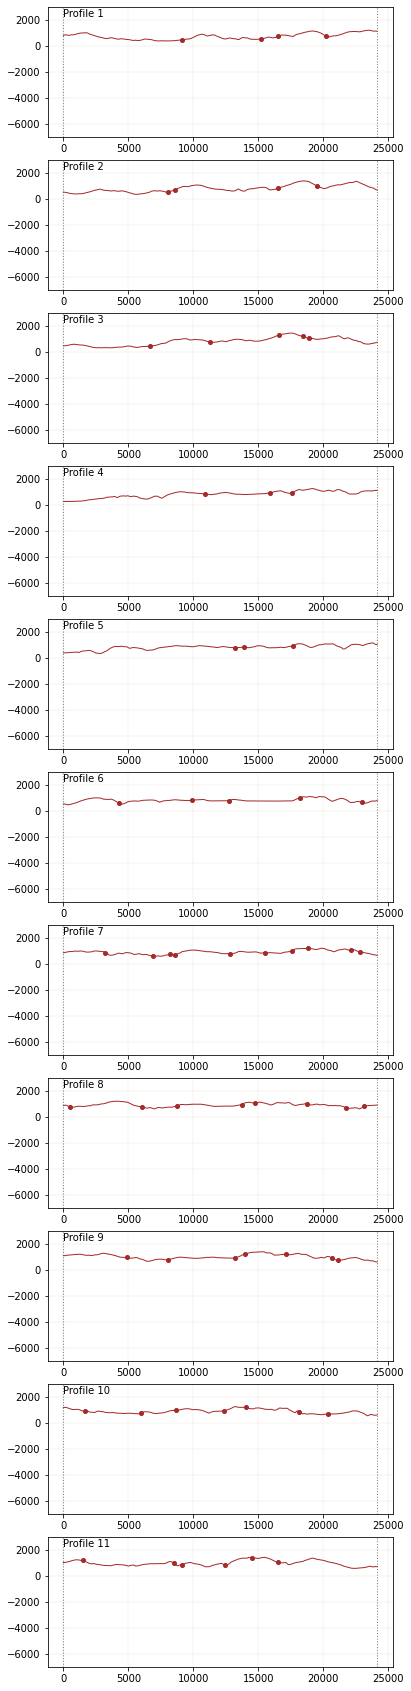

In [36]:
profiles(
    geoprofiles,
    aspect=1, 
    width=10,
    linewidth=1,
    axis_params=AxisPlotParams(
        z_min=-7000,
        z_max=3000,
    ),
    line_intersections = PointPlotParams(
        color="brown",
        markersize=4,
        labels=False,
        alpha=1
    )
)

## Adding hypocenters to profiles

In [37]:
hypocenters_pts = [(rec_id, point) for rec_id, point, _ in geofaults]

In [38]:
err = geoprofiles.project_points(
    data=hypocenters_pts,
    max_profile_distance=500, # meters
)
assert not err        

Processing profile 0
Processing profile 1
Processing profile 2
Processing profile 3
Processing profile 4
Processing profile 5
Processing profile 6
Processing profile 7
Processing profile 8
Processing profile 9
Processing profile 10


In [39]:
geoprofiles._points_projections

{'points': [defaultdict(pygsf.profiles.profiletraces.PointTrace,
              {27: PointTrace(s=15098.03, z=-2965.00, dist=466.88),
               29: PointTrace(s=15222.18, z=-3442.00, dist=469.88),
               70: PointTrace(s=11944.31, z=-3051.00, dist=5.88),
               306: PointTrace(s=12837.87, z=-5371.00, dist=498.92),
               317: PointTrace(s=13948.47, z=-5579.00, dist=87.46)}),
  defaultdict(pygsf.profiles.profiletraces.PointTrace,
              {37: PointTrace(s=11710.65, z=-4027.00, dist=472.87),
               44: PointTrace(s=14453.21, z=-1384.00, dist=439.76),
               45: PointTrace(s=14048.23, z=-1981.00, dist=384.78),
               47: PointTrace(s=13972.27, z=-1823.00, dist=348.76),
               96: PointTrace(s=16307.97, z=-1679.00, dist=331.04),
               121: PointTrace(s=11448.56, z=-3502.00, dist=482.51),
               233: PointTrace(s=14434.25, z=-1802.00, dist=43.81),
               240: PointTrace(s=14628.00, z=-3377.00, dist=47

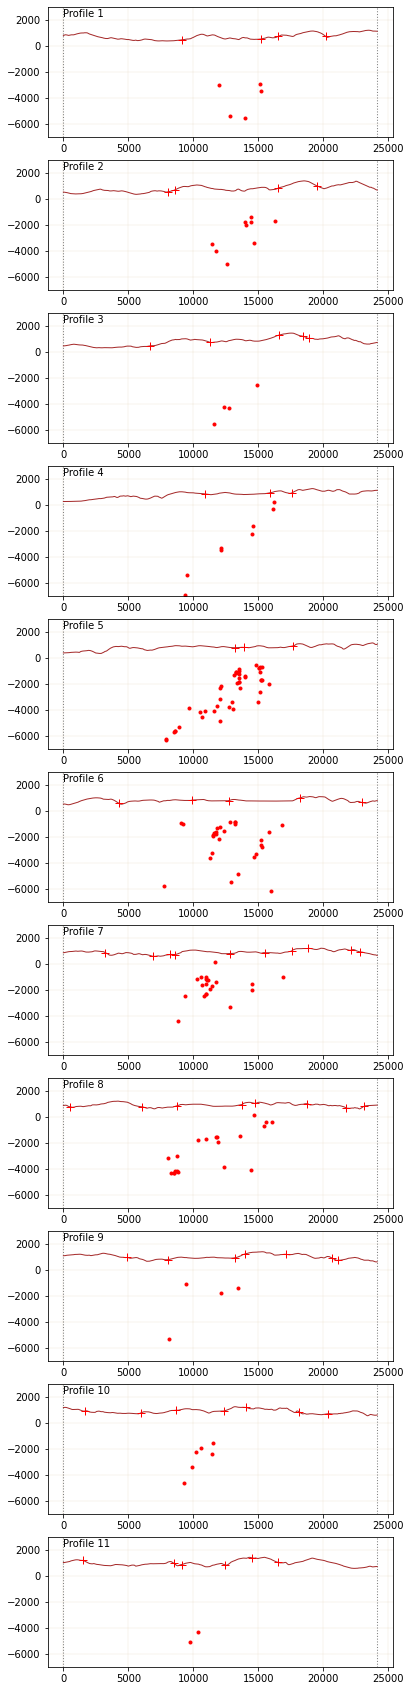

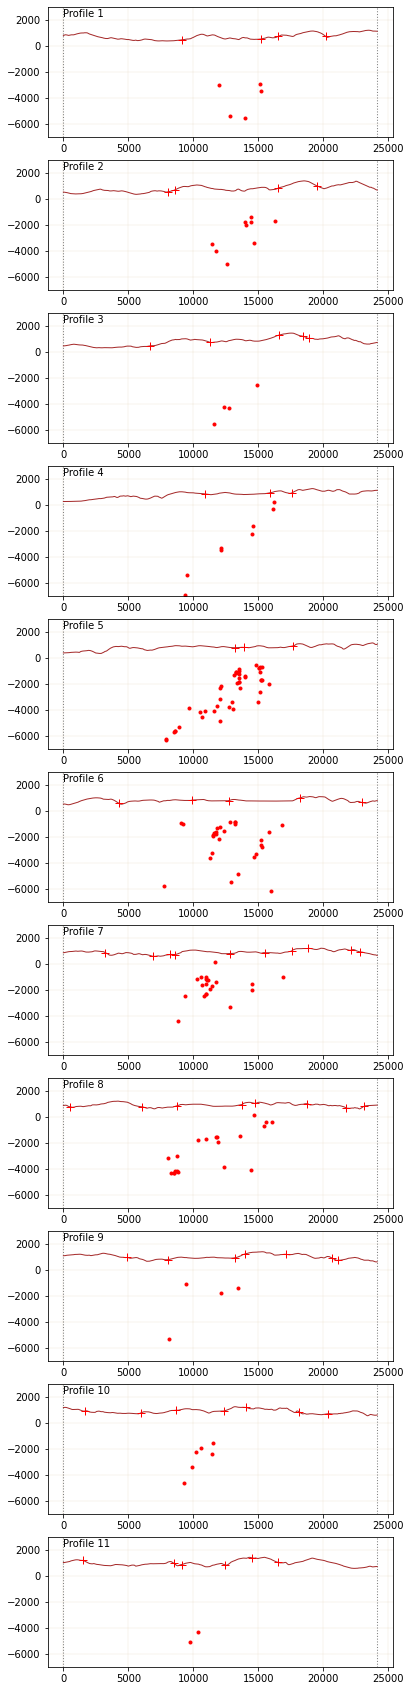

In [40]:
profiles(
    geoprofiles,
    aspect=1, 
    width=10,
    linewidth=1,
    axis_params=AxisPlotParams(
        z_min=-7000,
        z_max=3000,
    ),
    line_intersections = PointPlotParams(
        color="red",
        marker="+",
        markersize=8,
        labels=False,
        alpha=1
    ),
    points = PointPlotParams(
        color="red",
        markersize=3,
        labels=False,
        alpha=1
    )
)
